## OBJECTIVE

The dataset has been taken from Kaggle. 
There are 10683 rows and 13 columns.

The objective of this project is to study the effect of individual variables on the target variable "Price" and then finally obtaining a suitable model for predicting the flight fares.

We often find flight fares fluctuating a lot, at one time they go high up and then another time, they go down. It wonders most of us to understand what would be the right time to book a flight ticket to avail the minimum fare possible.
Therefore, it would be really helpful if we can build a model to predict flight fares based on certain features as mentioned above that would help the customers to plan their journey depending on these predicted flight fares.
 
Competition is a key factor which results in fluctuations of flight prices in the aviation industry since there is no monopoly. To compete with the contemporaries, aviation companies come up with different offers and discounts. Again, if a place has few airlines, the prices would be very high there compared to busy airports where there are many airlines. The model proposed in this model would also help the airline companies to predict the flight fares that they should maintain to attract more customers.
That is why, this project is interesting and important to build a suitable model for flight fares prediciton.



This project is covered in this following step:

Step 1: Importing Libraries and Download the Data

Step 2: Data Pre-processing, Exploratory Data Analysis (EDA) and Visualization

Missing Value Removal,
Extracting Date Time,
Correlation Matrix,
Visualization

Step 3 - Prepare the Dataset for Training

Identify Numeric columns,
Identify Categorical columns,
Identify Input columns,
Identify Target columns,
One hot encoding,
Train Test Split, 
Scale Numeric values with MinMaxScaler

Step 4: Building All Regressor Model and Evaluation Performance

Model Evaluation with r2 score, MAE, MSE and RMSE values

Metrics and Scoring: Quantifying the quality of Predictions


In [ ]:
#importing google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#data is stored in df1
df1=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")

print(df1.shape)

print(df1.columns)

df1.head()

(10683, 11)
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df=df1.copy() #df stores a copy of the original data

In [ ]:
df.shape #to get the dimensions of the data

(10683, 11)

In [ ]:
#checking the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Missing values removal

In [ ]:
#Checking missing values in columns
missing_sum=df.isnull().sum()
missing_sum

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
(missing_sum.sum()/df.shape[0])*100

0.018721332958906673

Percentage of missing values is less than 5%. So we can remove them.

In [ ]:
df.dropna(inplace=True) #dropping the missing values

Checking whether there are any duplicate values

In [ ]:
df[df.duplicated()] #checking for duplicated rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


These are same flights on different dates, we can drop them, but many a times flight fare varies from weekdays to weekends or on different days of a week, therefore, its better to keep them.

In [ ]:
#function to convert columns into datetime
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])
    

In [ ]:
#converting columns to datetime
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
  change_into_datetime(i)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-06-26 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-26 05:50:00,2022-06-26 13:15:00,7h 25m,2 stops,No info,7662


# Feature Engineering

In [ ]:
#storing the day, month and year of the journey_date column into three different columns
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df['journey_year']=df['Date_of_Journey'].dt.year

In [ ]:
#day of the week is stored in another column
df['day_of_week']=df['Date_of_Journey'].dt.day_name()

In [ ]:
df.drop('Date_of_Journey', axis=1, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-26 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-26 05:50:00,2022-06-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,Saturday


In [ ]:
#storing hour and minute in 2 columns
df['dep_time_hr']=df['Dep_Time'].dt.hour
df['dep_time_min']=df['Dep_Time'].dt.minute

In [ ]:
df['arr_time_hr']=df['Arrival_Time'].dt.hour
df['arr_time_min']=df['Arrival_Time'].dt.minute

In [ ]:
df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,Saturday,5,50,13,15


In [ ]:
#Duration column in splitted into hours and minutes in two new columns
df[['dur_hr', 'dur_min']] = df['Duration'].str.split(' ', 1,expand=True)

In [ ]:
df.drop('Duration',axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,Sunday,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,Saturday,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,Friday,9,25,4,25,19h,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,Thursday,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,Thursday,16,50,21,35,4h,45m


In [ ]:
#extracting only the number and removing the 'h' from hour to convert it to numeric column
for i in range(df.shape[0]):
    df['dur_hr'].iloc[i]=df['dur_hr'].iloc[i][:-1]
    

In [ ]:
df['dur_min'].fillna(0,inplace=True) #replacing any null value with 0
        

In [ ]:
#similarly, minute column is converted to numeric
for i in range(df.shape[0]):
    if(df['dur_min'].iloc[i]!=0):
        df['dur_min'].iloc[i]=df['dur_min'].iloc[i][:-1]
    else:
        df['dur_min'].iloc[i]=0

In [ ]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,Saturday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,Friday,9,25,4,25,19,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int64 
 8   journey_month    10682 non-null  int64 
 9   journey_year     10682 non-null  int64 
 10  day_of_week      10682 non-null  object
 11  dep_time_hr      10682 non-null  int64 
 12  dep_time_min     10682 non-null  int64 
 13  arr_time_hr      10682 non-null  int64 
 14  arr_time_min     10682 non-null  int64 
 15  dur_hr           10682 non-null  object
 16  dur_min          10682 non-null  object
dtypes: int64(8), object(9)
memory u

In [ ]:
df['dur_hr']=df['dur_hr'].astype('int64')
df['dur_min']=df['dur_min'].astype('int64')

In [ ]:
df.drop('journey_day',axis=1,inplace=True)

In [ ]:
df.drop('journey_year',axis=1,inplace=True)

NOTE: We can convert the minutes to hours and add them to the hour column since keeping both might not be meaningful.

In [ ]:
def min_to_hr(col):
  df[col]=round(df[col]/60,2)

In [ ]:
for i in ['dep_time_min','arr_time_min','dur_min']:
  min_to_hr(i)

In [ ]:
df['dep_time_hr']=df['dep_time_hr']+df['dep_time_min']
df['arr_time_hr']=df['arr_time_hr']+df['arr_time_min']
df['dur_hr']=df['dur_hr']+df['dur_min']

In [ ]:
df.drop(['dep_time_min','arr_time_min','dur_min'],axis=1,inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,day_of_week,dep_time_hr,arr_time_hr,dur_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,Sunday,22.33,1.17,2.83
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,Saturday,5.83,13.25,7.42


In [ ]:
df.shape

(10682, 12)

# EDA

In [ ]:
df.describe()

,Price,journey_month,dep_time_hr,arr_time_hr,dur_hr
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,5.534731,12.897974,13.760563,10.717264
std,4611.548810,2.987626,5.749600,6.821889,8.463485
min,1759.000000,1.000000,0.330000,0.080000,1.250000
25%,5277.000000,3.000000,8.000000,8.750000,2.830000
50%,8372.000000,5.000000,11.830000,14.080000,8.670000
75%,12373.000000,6.000000,18.080000,19.250000,15.500000
max,79512.000000,12.000000,23.920000,23.920000,47.670000


NOTE: 
The flight prices are in the range of 1759 to 79512 with a std of 4611. Mean flight price is 9087 and median is 8372.

From the above summary table, we can see that none of the variables are out of bound (for example: hour should be <= 23)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9e2e57fe50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e2e576a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e2e566b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e2e566a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e2e57f250>,
  <matplotlib.lines.Line2D at 0x7f9e2e175350>]}

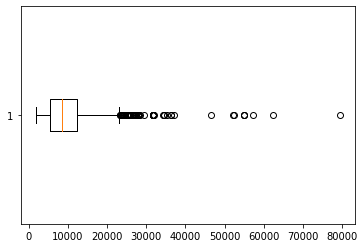

In [ ]:
#to check the distribution of price
plt.boxplot(df['Price'],vert=False)

NOTE: The distribution of Price is positively skewed with many outliers.

These outliers can affect our analysis of flight fare prediction since flight prices for certain extreme cases might become too high which is not normally the case in general times, therefore, keeping those outliers might affect our predction of the flight prices. Thus, we are removing the outliers here.

# OUTLIER REMOVAL

In [ ]:
#function to remove outliers
def outlier_removal(dataframe, dataframe2, limit = 3):
        
    for col in dataframe2:           # This is for the variables to be treated from upper right whisker
        rw = limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)) + dataframe[col].quantile(0.75)
        lw = dataframe[col].quantile(0.25)-(limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)))
        dataframe = dataframe[~(dataframe[col]>rw)]
        dataframe = dataframe[~(dataframe[col]<lw)]
        dataframe = dataframe   
    
    return dataframe

In [ ]:
col=['Price']
df= outlier_removal(df,df[col], limit = 3) #calling the function

{'boxes': [<matplotlib.lines.Line2D at 0x7f9e3ec71c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e3ec4fad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e3ec48190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e3ec48c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e3ec45a90>,
  <matplotlib.lines.Line2D at 0x7f9e3ec45cd0>]}

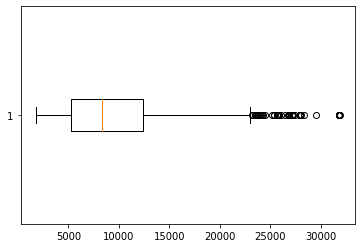

In [ ]:
plt.boxplot(df['Price'],vert=False)

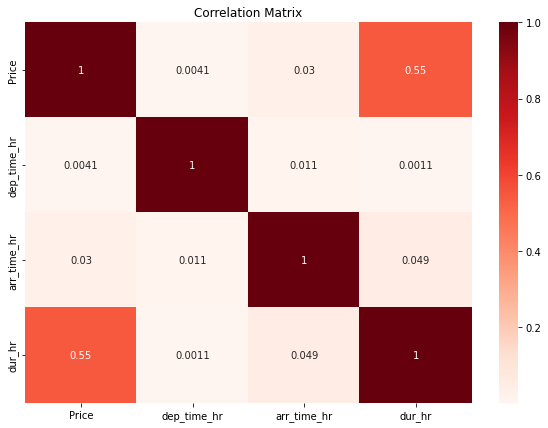

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 
df1=df.drop('journey_month',axis=1)
sns.heatmap(df1.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

NOTE: From the heatmap, we can see that none of the variables are too highly correlated with each other. Hence, I have considered all the variables.

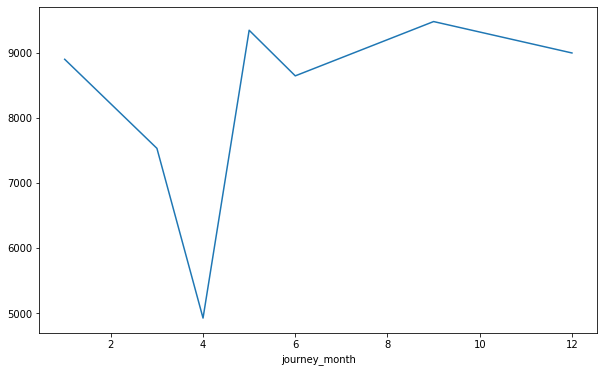

In [ ]:
plt.subplots(figsize=(10,6))
df.groupby('journey_month')['Price'].median().plot()

NOTE: Irrespective of months across a year, price varies between 8000 to 9000, although,  sharp drop can be observed for the month of March-April.

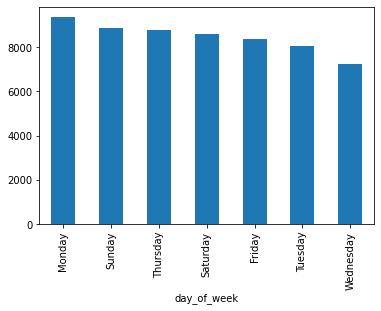

In [ ]:
df.groupby('day_of_week')['Price'].median().sort_values(ascending=False).plot(kind='bar')

NOTE: From the graph we can see that, weekends or weekdays don't have any significant effect on flight fare.

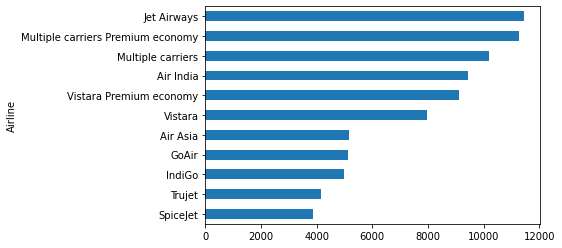

In [ ]:
t=df.groupby('Airline')['Price'].median().sort_values().plot(kind='barh')

NOTE: The airlines have flight fares in the range of 4000 to 10,000 with highest being for Multiple carriers Premium economy and Jet Airways.

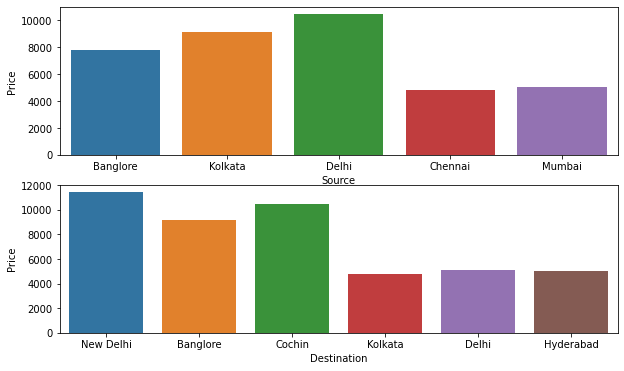

In [ ]:
f,ax=plt.subplots(2,figsize=(10,6))
sns.barplot(data=df, x='Source', y='Price',ci=False,ax=ax[0])
sns.barplot(data=df, x='Destination', y='Price',ci=False,ax=ax[1])

NOTE: Prices of flights vary with destination and sources. The highest being for New Delhi.

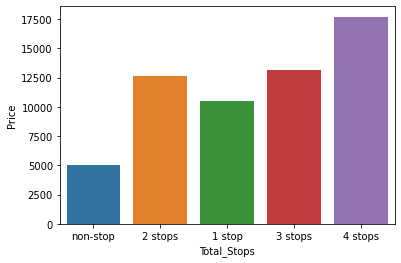

In [ ]:
sns.barplot(x='Total_Stops',y='Price',data=df,ci=False)

NOTE: As the number of stops increase, the flight fare increases.

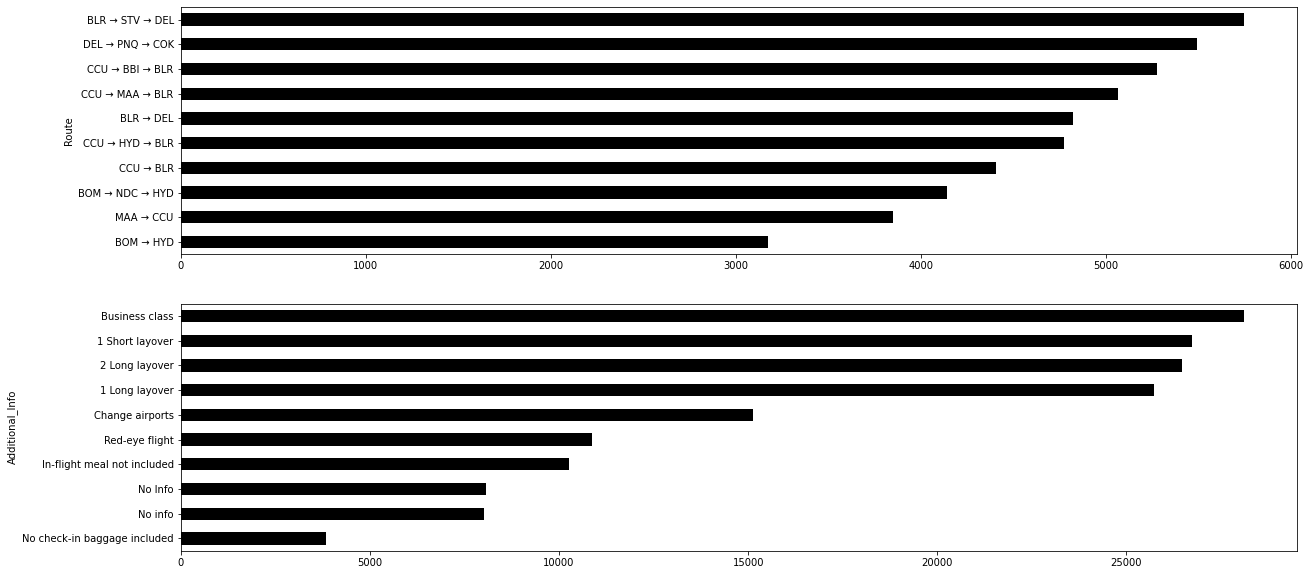

In [ ]:
f,ax=plt.subplots(2,1,figsize=(20,10))
df.groupby('Route')['Price'].median().sort_values()[:10].plot(kind='barh',ax=ax[0],color='black')
df.groupby('Additional_Info')['Price'].median().sort_values().plot(kind='barh',ax=ax[1],color='black')


NOTE: The price for the Bangalore-Surat-Delhi route is the highest while that of Bombay to Hyderabad is the lowest.
The price for the "Business class" is the highest. 

# Modeling 

In [ ]:
X= df.drop(columns=['Price']) # Input columns
y= df['Price'] # Target coulumn

In [ ]:
X.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_month,day_of_week,dep_time_hr,arr_time_hr,dur_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3,Sunday,22.33,1.17,2.83
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,Saturday,5.83,13.25,7.42
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9,Friday,9.42,4.42,19.00


In [ ]:
#Checking the numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols=numeric_cols[1:]
numeric_cols

['dep_time_hr', 'arr_time_hr', 'dur_hr']

In [ ]:
#checking the categorical columns
categorical_cols = X.select_dtypes('object').columns.tolist()

categorical_cols.append('journey_month')
categorical_cols

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'day_of_week',
 'journey_month']

In [ ]:
df2=df.copy() #creating a copy of df

In [ ]:
df2.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,day_of_week,dep_time_hr,arr_time_hr,dur_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,Sunday,22.33,1.17,2.83
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,Saturday,5.83,13.25,7.42


In [ ]:
#One hot encoding is done on the data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_BLR → AMD → DEL', 'Route_BLR → BBI → DEL', 'Route_BLR → BDQ → DEL', 'Route_BLR → BOM → AMD → DEL', 'Route_BLR → BOM → BHO → DEL', 'Route_BLR → BOM → DEL', 'Route_BLR → BOM → IDR → DEL', 'Route_BLR → BOM → IDR → GWL → DEL', 'Route_BLR → BOM → IXC → DEL', 'Route_BLR → BOM → JDH → DEL', 'Route_BLR → BOM → NAG → DEL', 'Route_BLR → BOM → UDR → DEL', 'Route_BLR → CCU → BBI → DEL', 'Route_BLR → CCU → BBI → HYD → DEL', 'Route_BLR → CCU → BBI → HYD → VGA → DEL', 'Route_BLR → CCU → DEL', 'Route_BLR → CCU

In [ ]:
X[encoded_cols] = encoder.transform(X[categorical_cols])

In [ ]:
X.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_month,day_of_week,dep_time_hr,arr_time_hr,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,journey_month_1,journey_month_3,journey_month_4,journey_month_5,journey_month_6,journey_month_9,journey_month_12
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3,Sunday,22.33,1.17,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,Saturday,5.83,13.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.drop(X[categorical_cols],axis=1,inplace=True)

In [ ]:
X.head(2)

,dep_time_hr,arr_time_hr,dur_hr,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,journey_month_1,journey_month_3,journey_month_4,journey_month_5,journey_month_6,journey_month_9,journey_month_12
0,22.33,1.17,2.83,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5.83,13.25,7.42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head(4)

0     3897
1     7662
2    13882
3     6218
Name: Price, dtype: int64

# TRAIN-TEST SPLIT

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train1, X_test1, y_train1, y_test1=X_train, X_test, y_train, y_test  

In [ ]:
#fitting min-max scaler on the train data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
#scaling the test data
X_test = scaler.transform(X_test)


In [ ]:
#importing the necessary libraries for modeling
from sklearn.linear_model import  LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [ ]:
X_train

array([[0.30394235, 0.87751678, 0.26389487, ..., 0.        , 0.        ,
        0.        ],
       [0.2615515 , 0.34270134, 0.52778975, ..., 1.        , 0.        ,
        0.        ],
       [0.39932175, 0.9614094 , 0.25850926, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.52988554, 0.87751678, 0.14907368, ..., 1.        , 0.        ,
        0.        ],
       [0.19457397, 0.80411074, 0.2817751 , ..., 1.        , 0.        ,
        0.        ],
       [0.18736753, 0.87751678, 0.32313658, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_test

array([[0.27214922, 0.18204698, 0.4398966 , ..., 1.        , 0.        ,
        0.        ],
       [0.69605765, 0.37080537, 0.32141318, ..., 0.        , 0.        ,
        0.        ],
       [0.28613819, 0.52432886, 0.09155536, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43450615, 0.87751678, 0.19754416, ..., 0.        , 0.        ,
        0.        ],
       [0.81263247, 0.52432886, 0.3410168 , ..., 0.        , 0.        ,
        0.        ],
       [0.53709199, 0.05956376, 0.24235243, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# call a function named 'ml_model' which will call all Regressor model
def predict(ml_model):

    # Define Models Name
    print('Model: {}'.format(ml_model))

    # fit all models with data
    model= ml_model.fit(X_train,y_train)

    # Model Training Score
    print("Training score: {}".format(model.score(X_train,y_train)))

    #finding adjusted R2 for the model
    adj_r2=1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    print("Training Adjusted R2: {}".format(adj_r2))

    # Model Predictions
    predictions = model.predict(X_test)

    # Define r2 score for Regressor Model
    r2score=r2_score(y_test,predictions) 
    print("r2 score: {}".format(r2score))
          
    # Model Evaluation with MAE, MSE, RMSE
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     

In [ ]:
predict(LinearRegression())

Model: LinearRegression()
Training score: 0.7557628413176896
Training Adjusted R2: 0.7504387111368079
r2 score: -1.6343408439875208e+18
MAE:179275639345.15955
MSE:2.9530421341589987e+25
RMSE:5434190035468.946


NOTE: The R2 value is negative in the test set, which means Linear Regression model is even worse than the basline model and should be completely rejected. Underfitting has occured here.



# KNN Regression Model

In [ ]:
predict(KNeighborsRegressor())

Model: KNeighborsRegressor()
Training score: 0.9075784884946199
Training Adjusted R2: 0.9055637903159184
r2 score: 0.8426401876482105
MAE:953.3327085285848
MSE:2843287.9090534206
RMSE:1686.2051799983954


KNN Regression using Hyper-parameter tuning

In [ ]:
# Random SearchCV for Hyper Parameter Tuning

n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 12, num = 11)]

random_grid = {'n_neighbors': n_neighbors}

train_model = KNeighborsRegressor(n_jobs = -1)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

train_model_random = RandomizedSearchCV(estimator = train_model, param_distributions = random_grid, n_iter = 10, cv = 5, 
                                        verbose=2, random_state=42, n_jobs = -1)

# Fit the Model
train_model_random.fit(X_train,y_train)

print(train_model_random.best_params_)
print(train_model_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_neighbors': 4}
KNeighborsRegressor(n_jobs=-1, n_neighbors=4)


In [ ]:
predict(KNeighborsRegressor(n_neighbors = 4, n_jobs = -1))

Model: KNeighborsRegressor(n_jobs=-1, n_neighbors=4)
Training score: 0.9172664439365519
Training Adjusted R2: 0.9154629336714246
r2 score: 0.8375894358932129
MAE:945.0481490159325
MSE:2934548.448717198
RMSE:1713.0523776922869


There is not much great improvement even after hyper-parameter tuning.

# Decision Tree Model

In [ ]:
predict(DecisionTreeRegressor(random_state=42))

Model: DecisionTreeRegressor(random_state=42)
Training score: 0.9906932192960362
Training Adjusted R2: 0.9904903406173775
r2 score: 0.8281477056384836
MAE:836.7232505467041
MSE:3105148.280228184
RMSE:1762.1430930058386


Decision Tree Model with Hyper-parameter Tuning

In [ ]:
# Random SearchCV for Hyper Parameter Tuning

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 10)]

max_features = ['auto', 'sqrt', 5, 6, 8, 10]


random_grid = {'max_features': max_features,
               'max_depth': max_depth}

train_model = DecisionTreeRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

train_model_random = RandomizedSearchCV(estimator = train_model, param_distributions = random_grid, n_iter = 10, cv = 5, 
                                        verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
train_model_random.fit(X_train,y_train)

print(train_model_random.best_params_)
print(train_model_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_features': 'auto', 'max_depth': 22}
DecisionTreeRegressor(max_depth=22, max_features='auto', random_state=42)


In [ ]:
predict(DecisionTreeRegressor(max_depth=22, max_features='auto', random_state=42))

Model: DecisionTreeRegressor(max_depth=22, max_features='auto', random_state=42)
Training score: 0.9796782521955495
Training Adjusted R2: 0.9792352580524892
r2 score: 0.8284414603149868
MAE:865.9150910795738
MSE:3099840.5138585703
RMSE:1760.6363945626508


NOTE: Even after hyper parameter tuning, there is not much significant improvement in the model.

#Random Forest Regression

In [ ]:
predict(RandomForestRegressor(random_state = 42))

Model: RandomForestRegressor(random_state=42)
Training score: 0.9776828557712771
Training Adjusted R2: 0.9771963639459534
r2 score: 0.8799945826053446
MAE:772.4789710376966
MSE:2168342.3944121953
RMSE:1472.5292507832214


Random Forest Regression with Hyper-parameter tuning

In [ ]:
# Random SearchCV for Hyper Parameter Tuning

# Maximum number of levels in tree
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
max_depth = [int(x) for x in np.linspace(5, 25, num = 10)]
max_features = ['auto', 'sqrt', 5, 6, 8, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

train_model = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

train_model_random = RandomizedSearchCV(estimator = train_model, param_distributions = random_grid, n_iter = 10, cv = 5, 
                                        verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
train_model_random.fit(X_train,y_train)

print(train_model_random.best_params_)
print(train_model_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 25}
RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=300,
                      random_state=42)


In [ ]:
predict(RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=300,
                      random_state=42))

Model: RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=300,
                      random_state=42)
Training score: 0.9657166840161527
Training Adjusted R2: 0.9649693413991854
r2 score: 0.8676045943204835
MAE:899.1384561208652
MSE:2392213.428300463
RMSE:1546.6781915771824


Results have not improved much and hence, boosting models have to be checked.

# XGBoost Regression

In [ ]:
predict(XGBRegressor(random_state=42))

Model: XGBRegressor(random_state=42)
[16:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score: 0.8013472345944477
Training Adjusted R2: 0.7970167994161257
r2 score: 0.7884195694020628
MAE:1344.5651912671333
MSE:3822984.2239932604
RMSE:1955.2453104388871


XGBoost Regression with Hyper-parameter tuning

In [ ]:
# Random SearchCV for Hyper Parameter Tuning

# Maximum number of levels in tree
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]

max_features = ['auto', 'sqrt', 5, 6, 8, 10]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

train_model = XGBRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

train_model_random = RandomizedSearchCV(estimator = train_model, param_distributions = random_grid, n_iter = 10, cv = 5, 
                                        verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
train_model_random.fit(X_train,y_train)

print(train_model_random.best_params_)
print(train_model_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:06:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10}
XGBRegressor(max_depth=10, max_features='auto', n_estimators=200,
             random_state=42)


In [ ]:
predict(XGBRegressor(max_depth=10, max_features='auto', n_estimators=200,
             random_state=42))

Model: XGBRegressor(max_depth=10, max_features='auto', n_estimators=200,
             random_state=42)
[17:06:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score: 0.9718591934617518
Training Adjusted R2: 0.971245751517811
r2 score: 0.9034907914402746
MAE:750.1261884980706
MSE:1743796.346151793
RMSE:1320.5288130714123


NOTE: RMSE, MAE,MSE scores have decreased as compared to all the other models. Hence, we will prefer the XGBoost model over all.

Feature Importance Plot of Top 10 features from XGBoost model.

[17:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 1.0, 'Feature Importance')

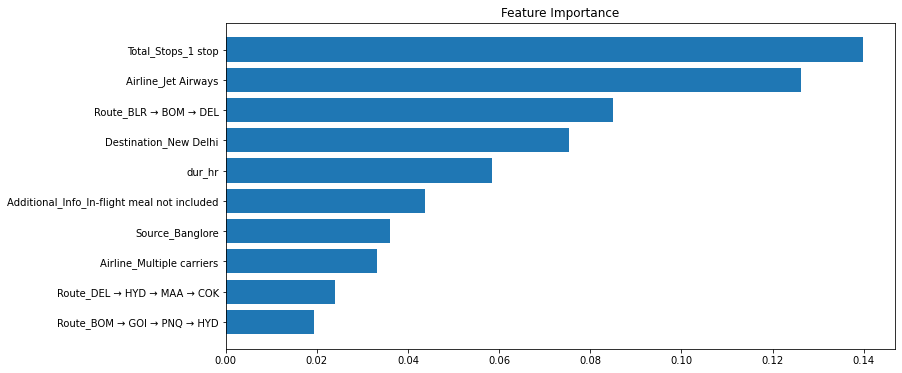

In [ ]:
model=XGBRegressor(max_depth=10, max_features='auto', n_estimators=200,
             random_state=42)
model.fit(X_train,y_train)
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx=sorted_idx[-10:len(sorted_idx)]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test1.columns)[sorted_idx])
plt.title('Feature Importance')


#CONCLUSION

After looking at performance of all the models, based on performance metrics viz., RMSE, MAE and MSE are minimum for XGBoost Regression model (R2 is maximum) and hence that is the best performing model to predict the flight fares.

This project aims at helping the airline companies to understand which attributes affect the flight fares and how the prices vary across their competitors. Using the Machine Learning model, they would be able to predict the prices that they should maintain to grow their business.

Accordingly, it will help the customers to predict future prices and plan their journey accordingly.